# To-Do
- Join data tables
 - Set time intervals to 5 minutes
- Feature engineering
 - Weekday/Holiday from date
 - day time - morning, afternoon, night
 - rush hour
- Data Augmentation
 - Enhance weather data by looking up the dates on the web in the city


**Model Building**
- Cluster common routes
- Build a model to predict traffic rating


In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import datetime as dt
#Visualisation Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns
from data.make_data import DataSet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
print("Start reading data:")
parentdir = os.path.dirname(os.getcwd())
datadir = os.path.join(parentdir, "data", "preprocessed")
dataset = DataSet(datadir,file_ending=".csv")
tracks, trackspoints = dataset.get_data()
trackspoints = dataset._preprocess_trackspoint_data(trackspoints)

Start reading data:


Tracks data set

In [13]:
print("Number of data records: ", len(tracks))

tracks.head()

Number of data records:  129


,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,linha,car_or_bus
0,1,0,19.210586,8.27,2.652,3,0,0,no_answer,1
1,2,0,30.848229,10.22,5.290,3,0,0,no_answer,1
2,3,1,13.560101,3.90,0.918,3,0,0,no_answer,0
3,4,1,19.766679,27.18,7.700,3,0,0,no_answer,0
4,8,0,25.807401,1.73,3.995,2,0,0,no_answer,1


Trackspoints data set

In [14]:
print("Number of data records: ", len(trackspoints))
trackspoints.head()

Number of data records:  14206


,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


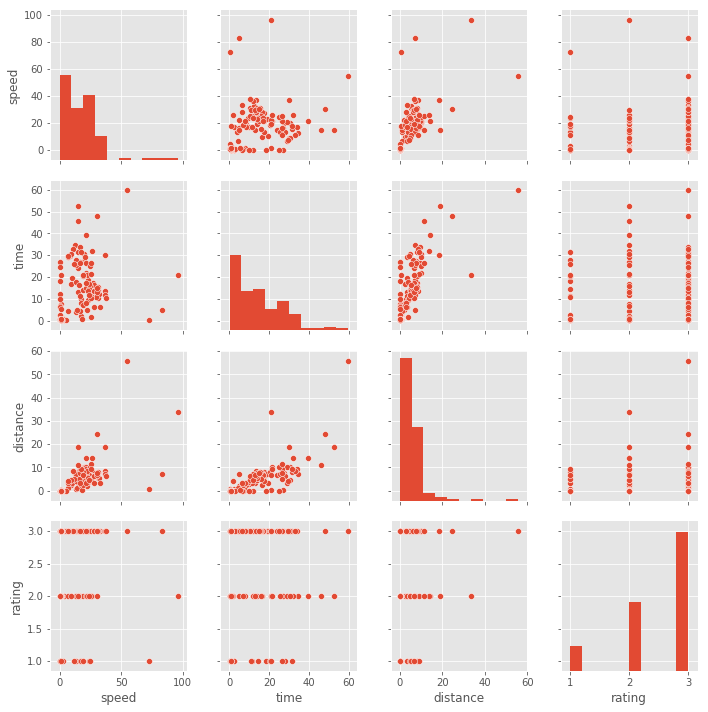

In [7]:
tracks_cor = tracks[['speed','time','distance','rating']]

sns.pairplot(tracks_cor);

----
**Visualise distribution of time recordings**


In [50]:
date_frame = pd.DataFrame(unique_dates,columns=["date"])
print("Number of unique dates: ", len(date_frame))
date_frame.iloc[0:10]

Number of unique dates:  70


,date
0,2015-06-17
1,2015-03-30
2,2015-04-29
3,2014-09-30
4,2015-08-17
5,2015-11-21
6,2015-05-12
7,2015-02-12
8,2015-05-16
9,2014-09-17


In [110]:
sorted_date = trackspoints["time"].dt.to_period('M').sort_values()
sorted_date = sorted_date.value_counts().to_frame().reset_index()

In [111]:
sorted_date = sorted_date.rename(columns={'time': 'count', 'index': 'time'})
sorted_date = sorted_date["time"].sort_values().to_frame().reset_index()
sorted_date = sorted_date.rename(columns={'index': 'count'})
sorted_date.head()

,count,time
0,6,2014-09
1,4,2014-10
2,2,2014-11
3,7,2014-12
4,12,2015-01


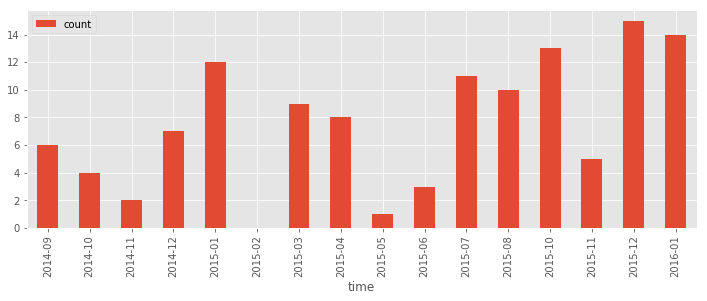

In [112]:
sorted_date.set_index("time").plot(kind='bar', figsize=(12,4));